# PA 2: Classification - Decision Tree

## Student Details


Student Name and ID: Priyanka Wakte 1001886133


Notes:
When submitting, fill your name and ID in this cell. Note that this is a markdown cell!<br>
Do not make any changes in the dataset file and do not rename the 'database.csv'.
<br> Rename your submission file to <b> 'yourLastName_Last4digitsofyourID_PA1.ipynb' </b>. 
<br> Do not to forget to cite any external sources used by you. 
**10 points per question will be deducted incase you fail to do so**
<br>**DO NOT DELETE THIS CELL**<br>
#### Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn

In [1]:
## Programming Assignment Submission Instructions (2 Points)

#Step 1: Rename this submission file as 'yourLastName_Last4digitsofyourID_DT.ipynb' [1 point]

#Step 2: Place this file inside the folder 'PA#2_Classification_yourLastName'  [1 point]

## Load libraries

In [2]:
#Required imports are listed

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import CategoricalNB

from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import datasets
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression





## Programming Assignment Details (7 Points)


For this assignment use Jupyter notebook, Panda, and scikit.

1) Load Gender_Classifier.csv .Output/prediction variable is 'gender'  [1 points]


2) Create a dataframe and print the first and last seven records of your dataset.  [2 points]

3) Print the class labels.  [2 points]


4) Split your dataset 60% for training, 20 for validation and 20% for testing the classifier. Use random state as 2022  [2 points]

## 1) Load Dataset

In [3]:
df_dt=pd.read_csv('Gender_Classifier.csv',encoding='ANSI') # loading dataset
le = preprocessing.LabelEncoder()
df_dt = df_dt.apply(le.fit_transform)



## Preprocessing

In [4]:
# Information of dataset
print (">>Task 1-a: Details of df_dt data frame are: \n", ) 
df_dt.info()


null_col=df_dt.columns[df_dt.isnull().any()] #Null values are checked
print("\n>>Following shows column and number of null entries in the column\n",df_dt[null_col].isnull().sum())

>>Task 1-a: Details of df_dt data frame are: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   _unit_id               20050 non-null  int64
 1   _golden                20050 non-null  int64
 2   _unit_state            20050 non-null  int32
 3   _trusted_judgments     20050 non-null  int64
 4   _last_judgment_at      20050 non-null  int32
 5   gender                 20050 non-null  int32
 6   gender:confidence      20050 non-null  int64
 7   profile_yn             20050 non-null  int32
 8   profile_yn:confidence  20050 non-null  int64
 9   created                20050 non-null  int32
 10  description            20050 non-null  int32
 11  fav_number             20050 non-null  int64
 12  gender_gold            20050 non-null  int32
 13  link_color             20050 non-null  int32
 14  name                   20050 non-null  

In [33]:
df_dt.isnull().sum()

_unit_id                 0
_golden                  0
_unit_state              0
_trusted_judgments       0
_last_judgment_at        0
gender                   0
gender:confidence        0
profile_yn               0
profile_yn:confidence    0
created                  0
description              0
fav_number               0
gender_gold              0
link_color               0
name                     0
profile_yn_gold          0
profileimage             0
retweet_count            0
sidebar_color            0
text                     0
tweet_coord              0
tweet_count              0
tweet_created            0
tweet_id                 0
tweet_location           0
user_timezone            0
dtype: int64

## 2) Create a dataframe and print the first and last seven records of your dataset

In [7]:
df_dt.head(7) #first 7 data

_unit_id  _golden  _unit_state  _trusted_judgments  _last_judgment_at  \
0         0        0            0                   0                101   
1         1        0            0                   0                107   
2         2        0            0                   0                110   
3         3        0            0                   0                 87   
4         4        0            0                   0                212   
5         5        0            0                   0                244   
6         6        0            0                   0                254   

   gender  gender:confidence  profile_yn  profile_yn:confidence  created  ...  \
0       3                922           1                    266     4986  ...   
1       3                922           1                    266     1347  ...   
2       3                561           1                    266     3705  ...   
3       3                922           1                    266    11907  ...   
4       2                922           1                    266     8932  ...   
5       2                922           1                    266     6829  ...   
6       1                922           1                    266     9459  ...   

   profileimage  retweet_count  sidebar_color   text  tweet_coord  \
0          2179              0            560  13472          146   
1          4099              0            366  18370          146   
2         14587              1            366  17412          146   
3           913              0            366   9180          146   
4          4705              0              0  16005          146   
5         13696              0              0  11182          146   
6          3878              0              0   1681          146   

   tweet_count  tweet_created  tweet_id  tweet_location  user_timezone  
0        13177              1         0            7045             48  
1         4362              1         0            7864             55  
2         3599              1         0            6613             28  
3         1465              1         0            4426            118  
4         8878              1         0            7864            156  
5         7418              1         0            4010             47  
6         6113              1         0            6323             55  

[7 rows x 26 columns]

In [8]:
df_dt.tail(7) #last 7 data

_unit_id  _golden  _unit_state  _trusted_judgments  _last_judgment_at  \
20043     20043        1            1                   9                283   
20044     20044        1            1                   2                283   
20045     20045        1            1                  23                283   
20046     20046        1            1                  14                283   
20047     20047        1            1                  27                283   
20048     20048        1            1                  16                283   
20049     20049        1            1                  15                283   

       gender  gender:confidence  profile_yn  profile_yn:confidence  created  \
20043       3                922           1                    266    18109   
20044       2                922           1                    266    11933   
20045       2                922           1                    266    16810   
20046       3                922           1                    266    15602   
20047       3                922           1                    266    18292   
20048       2                914           1                    266     3920   
20049       2                922           1                    266     8773   

       ...  profileimage  retweet_count  sidebar_color   text  tweet_coord  \
20043  ...          1982              1            212   8568          146   
20044  ...          9253              0            366  12446          146   
20045  ...         14037              0            366   5169          146   
20046  ...          8702              0              0   8843          146   
20047  ...         13032              0            366  16796          146   
20048  ...         14983              0              0   4294          146   
20049  ...         12824              0            366  10214          146   

       tweet_count  tweet_created  tweet_id  tweet_location  user_timezone  
20043         4628              3         0            1432            156  
20044         4057              3         0            7864            156  
20045          746              4         0            5974            156  
20046         6160              1         0            3011            156  
20047         8263              4         0            3156            156  
20048        11172              1         0            5539            156  
20049         2236              3         0            7864            156  

[7 rows x 26 columns]

## 3) Print class labels

In [9]:
df_dt.columns #column labels

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

## 4) Split your dataset 60% for training, 20 for validation and 20% for testing the classifier.

In [10]:
print(df_dt.value_counts(normalize=True))
print("\nBefore split -- Type feature distribution\n")


_unit_id  _golden  _unit_state  _trusted_judgments  _last_judgment_at  gender  gender:confidence  profile_yn  profile_yn:confidence  created  description  fav_number  gender_gold  link_color  name   profile_yn_gold  profileimage  retweet_count  sidebar_color  text   tweet_coord  tweet_count  tweet_created  tweet_id  tweet_location  user_timezone
0         0        0            0                   101                3       922                1           266                    4986     13021        0           6            248         17159  1                2179          0              560            13472  146          13177        1              0         7045            48               0.00005
13364     0        0            0                   27                 2       922                1           266                    8746     6553         2378        6            1675        11174  1                11160         0              560            17644  146          7143         

In [11]:

X = df_dt.loc[:,df_dt.columns != 'gender']   #Getting all the data except id and gender columns
y = df_dt.loc[:,'gender']  #gender is target variable.

# Training,validation and testing the dataset by splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2022)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=2022)
print('Training DataSet size' )
print(X_train.shape)
print('Validation DataSet size' )
print(X_val.shape)
print('Testing DataSet size' )
print(X_test.shape)


Training DataSet size
(12030, 25)
Validation DataSet size
(4010, 25)
Testing DataSet size
(4010, 25)


# DecisionTree (10 Points)
1) Use gini and entropy to measure the quality of a split.  [2 points]


2) Use comments to explain your code and variable names. [1 point]


3) Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support. Explain the confusion matrix and classification report in your own words) [2 points]

4) Print the decision tree visualization for 3 different ds using given libraries.  [5 points]


## 1) Gini to measure the quality of a split

In [12]:
# mdr 4,5,6
mdr = list(range(3, 6))

# List to store the accuracy for each max_depth
acc = []

#accuracy scores for different ds are printed.
for d in mdr: 
    gini = DecisionTreeClassifier(max_depth = d)
    gini.fit(X_train, y_train)
    Y_p_gini = gini.predict(X_test)
    print("acc score of Gini for d ",d,"=",accuracy_score(y_test,Y_p_gini))  # printing accuracy score

acc score of Gini for d  3 = 0.49900249376558603
acc score of Gini for d  4 = 0.5034912718204488
acc score of Gini for d  5 = 0.5037406483790524


## 2) Entropy to measure the quality of a split

In [13]:
# mdr 4,5,6
mdr = list(range(4, 7))

# List to store the accuracy for each max_depth
acc = []

#accuracy scores for different ds are printed.
for d in mdr: 
    entropy = DecisionTreeClassifier(max_depth = d,random_state = 0,criterion = "entropy")
    entropy.fit(X_train, y_train)
    Y_p_ent= entropy.predict(X_test)
    print("acc score of Entropy for d ",d,"=",accuracy_score(y_test,Y_p_ent)) # printing acc score
   

acc score of Entropy for d  4 = 0.5012468827930174
acc score of Entropy for d  5 = 0.5067331670822942
acc score of Entropy for d  6 = 0.5089775561097257


## 3) Confusion matrix

## Of Gini

## Confusion matrix

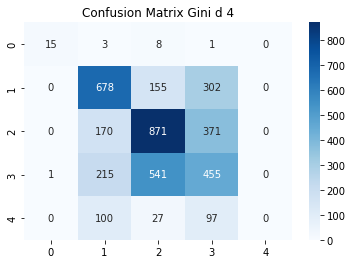

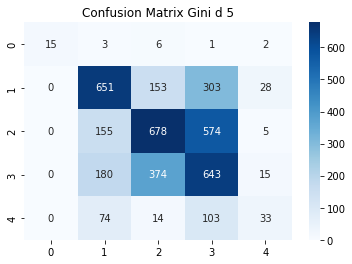

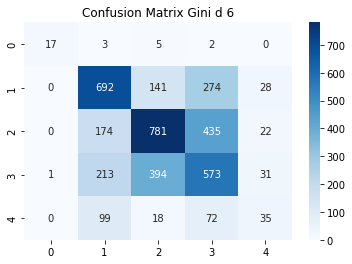

In [14]:
# mdr 4,5,6
mdr = list(range(4, 7))
cf_matrix = []

#confusion matric for different ds are calculated.
for d in mdr: 
    gini = DecisionTreeClassifier(max_depth = d,random_state = 0,criterion='gini')
    gini.fit(X_train, y_train)
    Y_p_gini = gini.predict(X_test)
    cf_matrix = confusion_matrix(y_test,Y_p_gini)
        
    gl = ["True Negative","False Positive","False Negative","True Positive"]

    gcnt = ['{0:0.0f}'.format(value) for value in
                        cf_matrix.flatten()]
    gpercent = ['{0:.2%}'.format(value) for value in
                             cf_matrix.flatten()/np.sum(cf_matrix)]
    l = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
                  zip(gl,gcnt,gpercent)]
    l = np.asarray(l).reshape(2,2)
    plt.title("Confusion Matrix Gini d "+str(d))
    sns.heatmap(cf_matrix  , annot=True, fmt='' ,cmap='Blues')
    plt.show()

## Classification report

In [15]:
# mdr 4,5,6
mdr = list(range(4, 7))

for d in mdr: 
    gini = DecisionTreeClassifier(max_depth = d,random_state = 0,criterion='gini')
    gini.fit(X_train, y_train)
    Y_p_gini = gini.predict(X_test)
    print("Classification Report for d ",d)
    print(classification_report(y_test,Y_p_gini))

Classification Report for d  4
              precision    recall  f1-score   support

           0       0.94      0.56      0.70        27
           1       0.58      0.60      0.59      1135
           2       0.54      0.62      0.58      1412
           3       0.37      0.38      0.37      1212
           4       0.00      0.00      0.00       224

    accuracy                           0.50      4010
   macro avg       0.49      0.43      0.45      4010
weighted avg       0.47      0.50      0.49      4010



C:\Users\priya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\priya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\priya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for d  5
              precision    recall  f1-score   support

           0       1.00      0.56      0.71        27
           1       0.61      0.57      0.59      1135
           2       0.55      0.48      0.51      1412
           3       0.40      0.53      0.45      1212
           4       0.40      0.15      0.21       224

    accuracy                           0.50      4010
   macro avg       0.59      0.46      0.50      4010
weighted avg       0.52      0.50      0.50      4010

Classification Report for d  6
              precision    recall  f1-score   support

           0       0.94      0.63      0.76        27
           1       0.59      0.61      0.60      1135
           2       0.58      0.55      0.57      1412
           3       0.42      0.47      0.45      1212
           4       0.30      0.16      0.21       224

    accuracy                           0.52      4010
   macro avg       0.57      0.48      0.51      4010
weighted avg   

## Of Entropy

## Confusion Matrix

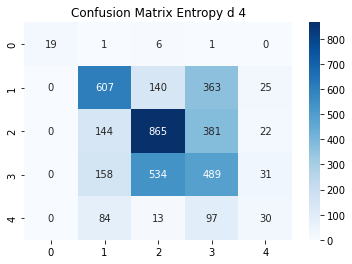

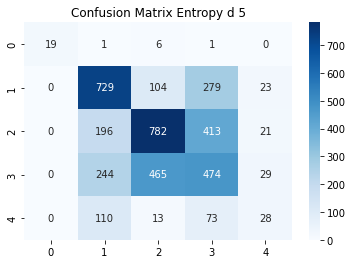

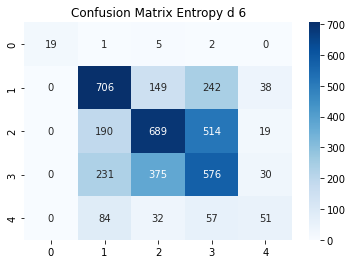

In [16]:

mdr = list(range(4, 7))# max depth range 4,5,6
#confusion matric for different ds are calculated.
cf_matrix = []
for d in mdr: 
    entropy = DecisionTreeClassifier(max_depth = d,random_state = 0,criterion='entropy')
    entropy.fit(X_train, y_train)
    Y_p_ent = entropy.predict(X_test)
    cf_matrix = confusion_matrix(y_test,Y_p_ent)


    gl = ["True Negative","False Positive","False Negative","True Positive"]

    gcnt = ['{0:0.0f}'.format(value) for value in
                    cf_matrix.flatten()]
    gpercent = ['{0:.2%}'.format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]
    l = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
              zip(gl,gcnt,gpercent)]
    l = np.asarray(l).reshape(2,2)
    plt.title("Confusion Matrix Entropy d "+str(d))
    sns.heatmap(cf_matrix, annot=True, fmt='' ,cmap='Blues')
    plt.show()

## Classification Report

In [17]:
mdr = list(range(4, 7))# max depth range 4,5,6

for d in mdr: 
    entropy = DecisionTreeClassifier(max_depth = d,random_state = 0,criterion='entropy')
    entropy.fit(X_train, y_train)
    Y_p_ent = entropy.predict(X_test)
    print("Classification Report for d ",d)
    print(classification_report(y_test,Y_p_ent))

Classification Report for d  4
              precision    recall  f1-score   support

           0       1.00      0.70      0.83        27
           1       0.61      0.53      0.57      1135
           2       0.56      0.61      0.58      1412
           3       0.37      0.40      0.38      1212
           4       0.28      0.13      0.18       224

    accuracy                           0.50      4010
   macro avg       0.56      0.48      0.51      4010
weighted avg       0.50      0.50      0.50      4010

Classification Report for d  5
              precision    recall  f1-score   support

           0       1.00      0.70      0.83        27
           1       0.57      0.64      0.60      1135
           2       0.57      0.55      0.56      1412
           3       0.38      0.39      0.39      1212
           4       0.28      0.12      0.17       224

    accuracy                           0.51      4010
   macro avg       0.56      0.48      0.51      4010
weighted avg   

## 4) Decision tree visualization 

## Using Gini 

In [18]:
mdr = list(range(4, 7))# max d range 4,5,6
for d in mdr: 
    gini = DecisionTreeClassifier(max_depth = d,random_state = 0,criterion='gini')
    gini.fit(X_train, y_train)
    
    fig, axes = plt.subplots(nrows = 1,ncols =1 , figsize=(130,130))
  
    tree.plot_tree(gini,filled = True);
    fig.savefig('gini'+str(d)+'.png')


## Using Entropy

In [19]:
mdr = list(range(4, 7))# max depth range 4,5,6
for d in mdr: 
    entropy = DecisionTreeClassifier(max_depth = d,random_state = 0,criterion='entropy')
    entropy.fit(X_train, y_train)
   
    fig, axes = plt.subplots(nrows = 1,ncols =1 , figsize=(130,130))
   
    tree.plot_tree(entropy, filled = True);
    fig.savefig('entropy'+str(d)+'.png')
    

# Naive Bayes (10 Points)

1) Use all types of Naive bayes classifier present in the sklearn to predict the test data. If you are not able to implement any of the classifier explain in detail why it can't be done.[5 point] 

2) Use comments to explain your code and variable names[1 point]

3) Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support)for all the NB Classifier. show the best classifier. Explain the classification report in your own words. Do not copy from the internet. [4 points]

acc score of Naive Bayes: 0.3229426433915212
AxesSubplot(0.125,0.125;0.62x0.755)

Classification Report for Naive Bayes 
              precision    recall  f1-score   support

           0       0.47      1.00      0.64        27
           1       0.53      0.11      0.18      1135
           2       0.49      0.64      0.56      1412
           3       0.39      0.06      0.10      1212
           4       0.10      0.78      0.18       224

    accuracy                           0.32      4010
   macro avg       0.40      0.52      0.33      4010
weighted avg       0.45      0.32      0.29      4010



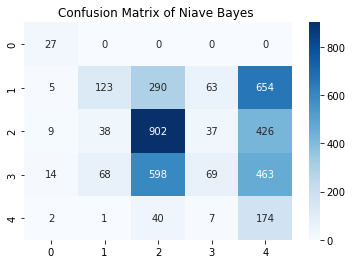

In [20]:
#Create a Gaussian Classifier
model = GaussianNB()

#model is trained using the training sets
model.fit(X_train,y_train)

#Predict Output
y_pred= model.predict(X_test)

# how often is the classifier correct,Model accuracy?
print("acc score of Naive Bayes:",metrics.accuracy_score(y_test, y_pred))

#Confusion matrix
confusionmatrix = metrics.confusion_matrix(y_test, y_pred)

gl = ["True Negative","False Positive","False Negative","True Positive"]

gcnt = ['{0:0.0f}'.format(value) for value in
                    confusionmatrix.flatten()]
gpercent = ['{0:.2%}'.format(value) for value in
                         confusionmatrix.flatten()/np.sum(cf_matrix)]

plt.title("Confusion Matrix of Niave Bayes ")

#confusion matrix Graphics
g = sns.heatmap(confusionmatrix, annot=True, fmt='' ,cmap='Blues')

print(g)

#Classification report
print("\nClassification Report for Naive Bayes ")
print(classification_report(y_test,y_pred))

acc score of Naive Bayes: 0.385286783042394
AxesSubplot(0.125,0.125;0.62x0.755)

Classification Report for Naive Bayes 
              precision    recall  f1-score   support

           0       0.01      0.22      0.02        27
           1       0.55      0.59      0.57      1135
           2       0.52      0.40      0.45      1412
           3       0.39      0.23      0.29      1212
           4       0.06      0.12      0.08       224

    accuracy                           0.39      4010
   macro avg       0.31      0.31      0.28      4010
weighted avg       0.46      0.39      0.41      4010



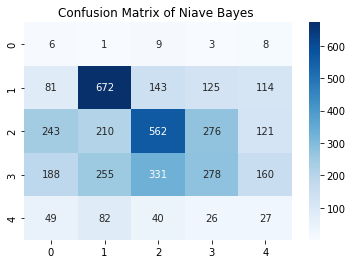

In [21]:
#Create a Multinomial NB Classifier
model = MultinomialNB()

#model is trained using the training sets
model.fit(X_train,y_train)

#Predict Output
y_pred= model.predict(X_test)

#how often is the classifier correct,Model accuracy?
print("acc score of Naive Bayes:",metrics.accuracy_score(y_test, y_pred))

#Confusion matrix
confusionmatrix = metrics.confusion_matrix(y_test, y_pred)

gl = ["True Negative","False Positive","False Negative","True Positive"]

gcnt = ['{0:0.0f}'.format(value) for value in
                    confusionmatrix.flatten()]
gpercent = ['{0:.2%}'.format(value) for value in
                         confusionmatrix.flatten()/np.sum(cf_matrix)]

plt.title("Confusion Matrix of Niave Bayes ")

#confusion matrix Graphics
g = sns.heatmap(confusionmatrix, annot=True, fmt='' ,cmap='Blues')

print(g)

#Classification report
print("\nClassification Report for Naive Bayes ")
print(classification_report(y_test,y_pred))

acc score of Naive Bayes: 0.4665835411471322
AxesSubplot(0.125,0.125;0.62x0.755)

Classification Report for Naive Bayes 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.45      0.73      0.56      1135
           2       0.48      0.67      0.56      1412
           3       0.46      0.08      0.13      1212
           4       0.07      0.00      0.01       224

    accuracy                           0.47      4010
   macro avg       0.29      0.30      0.25      4010
weighted avg       0.44      0.47      0.40      4010



C:\Users\priya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\priya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\priya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


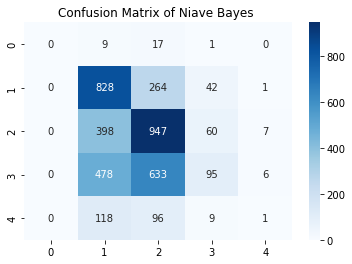

In [22]:
#Create a Complement NB Classifier
model = ComplementNB()

#model is trained using the training sets
model.fit(X_train,y_train)

#Predict Output
y_pred= model.predict(X_test)

# how often is the classifier correct,Model accuracy?
print("acc score of Naive Bayes:",metrics.accuracy_score(y_test, y_pred))

#Confusion matrix
confusionmatrix = metrics.confusion_matrix(y_test, y_pred)

gl = ["True Negative","False Positive","False Negative","True Positive"]

gcnt = ['{0:0.0f}'.format(value) for value in
                    confusionmatrix.flatten()]
gpercent = ['{0:.2%}'.format(value) for value in
                         confusionmatrix.flatten()/np.sum(cf_matrix)]

plt.title("Confusion Matrix of Niave Bayes ")

#confusion matrix graphics
g = sns.heatmap(confusionmatrix, annot=True, fmt='' ,cmap='Blues')

print(g)

#Classification report
print("\nClassification Report for Naive Bayes ")
print(classification_report(y_test,y_pred))

acc score of Naive Bayes: 0.4488778054862843
AxesSubplot(0.125,0.125;0.62x0.755)

Classification Report for Naive Bayes 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.69      0.38      0.49      1135
           2       0.40      0.85      0.54      1412
           3       0.39      0.12      0.18      1212
           4       0.00      0.00      0.00       224

    accuracy                           0.45      4010
   macro avg       0.49      0.47      0.44      4010
weighted avg       0.46      0.45      0.39      4010



C:\Users\priya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\priya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\priya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


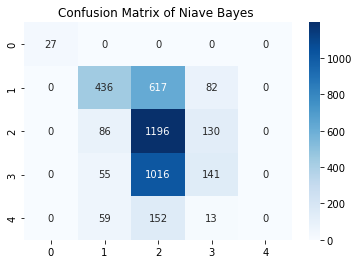

In [23]:
#Create a Bernoulli NB Classifier
model = BernoulliNB()

#model is trained using the training sets
model.fit(X_train,y_train)

#Predict Output
y_pred= model.predict(X_test)

# how often is the classifier correct,Model accuracy?
print("acc score of Naive Bayes:",metrics.accuracy_score(y_test, y_pred))

#Confusion matrix
confusionmatrix = metrics.confusion_matrix(y_test, y_pred)

gl = ["True Negative","False Positive","False Negative","True Positive"]

gcnt = ['{0:0.0f}'.format(value) for value in
                    confusionmatrix.flatten()]
gpercent = ['{0:.2%}'.format(value) for value in
                         confusionmatrix.flatten()/np.sum(cf_matrix)]

plt.title("Confusion Matrix of Niave Bayes ")

#confusion matrix graphics
g = sns.heatmap(confusionmatrix, annot=True, fmt='' ,cmap='Blues')

print(g)

#Classification report
print("\nClassification Report for Naive Bayes ")
print(classification_report(y_test,y_pred))

# Visualizing the target variable.

## Graph -1

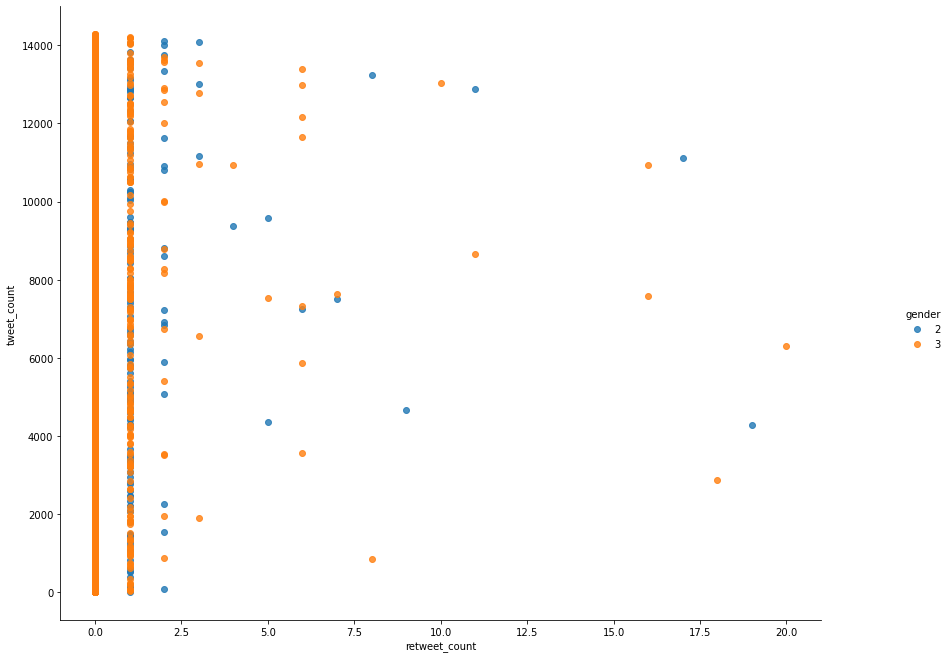

In [24]:
#Visualizing the presence or absence of gender based on fav_number and tweet_count
df_dt1 = df_dt[(df_dt['gender']==2) | (df_dt['gender']==3)]
a = 'retweet_count'
b = 'tweet_count'
data = df_dt1
sns.lmplot(x=a, y=b, data= df_dt1, hue='gender', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.show()

## Graph -2

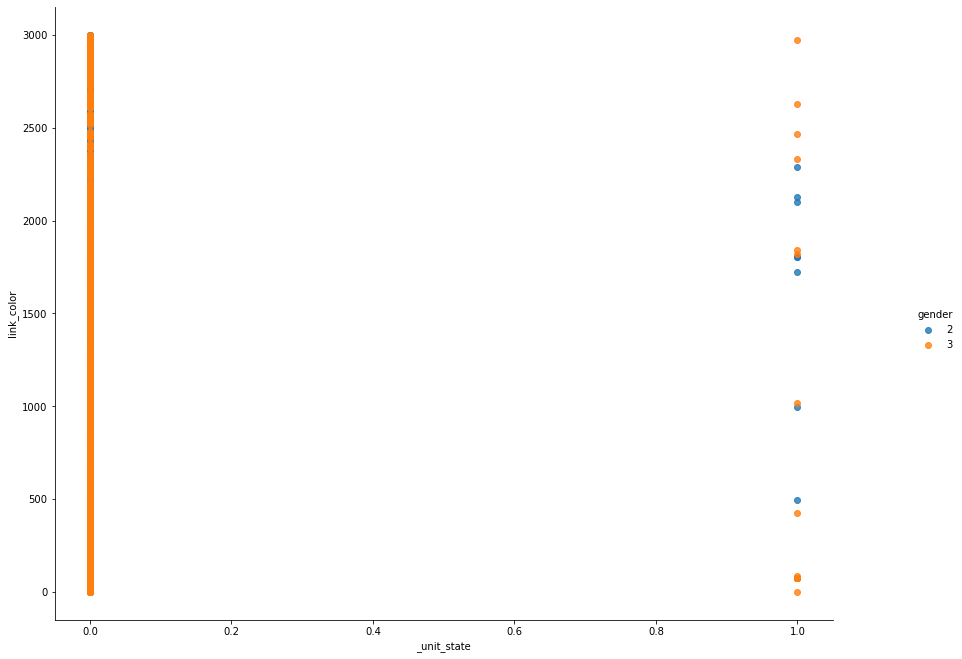

In [25]:
#Visualizing the presence or absence of gender based on unit state and link color.
df_dt1 = df_dt[(df_dt['gender']==2) | (df_dt['gender']==3)]
a = '_unit_state'
b ='link_color'
data = df_dt
sns.lmplot(x=a, y=b, data= df_dt1, hue='gender', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.show()

(array([  97.,    0., 5942.,    0.,    0., 6700.,    0., 6194.,    0.,
        1117.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

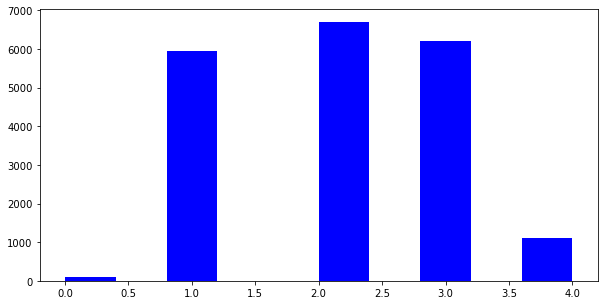

In [26]:
#distribution of target variable gender in the dataset.

plt.figure(figsize=(10,5))
plt.hist(df_dt['gender'],color='b')


## Report (23 Points)


1) Describe the Decision Tree methods, and Naive Bayes classifier in details in your own words. Dont copy paste it from the internet. Write it on your own.  [5 points]

2) Describe the datasets like what do you understand from the dataset? and if you have done any pre-processing , and your code, please write down your observation. [6 points]

4) Visualization of the decision tree for gini and entropy.[4 points]

5) Interpret your results, compare gini and entropy [4 points]

6) Visualize the dataset, for the target variable - 2 graphs [4 points]

Do not to forget to cite your sources!